# Assignment # 13  
Park Juyeon, Department of Statistics and Data Science, 2022311137

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

pd.options.display.float_format = '{:.5f}'.format
np.set_printoptions(suppress=True)
warnings.filterwarnings(action='ignore')
plt.rcParams['figure.facecolor'] = 'white'

----

# Q1.
Using Fisher's Iris data, answer the following questions. Note the class membership is already known. However, you may pretend the membership is unknown for the purpose of cluster analysis.

### Read data

In [2]:
iris = pd.read_csv('iris.dat', delim_whitespace = True, header = None)
# Class_name = ['setosa', 'versicolor', 'virginica']
iris.columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class']  # ["setosa", 'versicolor', 'virginica']
# iris.insert(0, 'ID', iris.index)
X = iris.iloc[:, :-1]
y = iris.iloc[:, -1]
X

,Sepal length,Sepal width,Petal length,Petal width
0,5.10000,3.50000,1.40000,0.20000
1,4.90000,3.00000,1.40000,0.20000
2,4.70000,3.20000,1.30000,0.20000
3,4.60000,3.10000,1.50000,0.20000
4,5.00000,3.60000,1.40000,0.20000
...,...,...,...,...
145,6.70000,3.00000,5.20000,2.30000
146,6.30000,2.50000,5.00000,1.90000
147,6.50000,3.00000,5.20000,2.00000
148,6.20000,3.40000,5.40000,2.30000


## a. Perform a density estimation-based cluster analysis: Mean-shift method, How many clusters do you find?


#### Find best bandwidth with Silhoutte score

In [3]:
from sklearn.cluster import MeanShift
from sklearn.metrics import silhouette_score

np.random.seed(0)
silhouette_meanshift = []
for banhwidth in np.arange(0.1, 0.8, 0.05):
    meanshift = MeanShift(bandwidth=banhwidth)
    clus = meanshift.fit_predict(X)
    sil_score = silhouette_score(X, clus)
    silhouette_meanshift.append((banhwidth, sil_score,
                                len(set(meanshift.labels_)) ))

df_meanshift = pd.DataFrame(silhouette_meanshift,
                            columns=['bandwidth', 'silhouette_score', 'number_of_clusters'])
df_meanshift.sort_values('silhouette_score', ascending=False)

,bandwidth,silhouette_score,number_of_clusters
13,0.75000,0.46057,5
11,0.65000,0.43018,9
12,0.70000,0.41311,6
8,0.50000,0.30701,16
10,0.60000,0.29756,10
9,0.55000,0.28757,13
7,0.45000,0.24079,22
4,0.30000,0.21673,68
5,0.35000,0.20137,46
3,0.25000,0.19854,87


- The silhouette score is highest when bandwidth is 0.75

In [4]:
# Clustering based in Density Estimation with best bandwidth
kde = MeanShift(bandwidth=0.75).fit(X)
kde.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 3, 2, 2, 3, 1, 3, 2, 3,
       2, 2, 2, 2, 2, 2, 2, 4, 3, 1, 3, 1, 3, 2, 2, 3, 1, 1, 2, 3, 3, 4,
       2, 2, 2, 3, 2, 2, 1, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2])

In [5]:
np.unique(kde.labels_, return_counts=True)

(array([0, 1, 2, 3, 4]), array([51, 53, 32, 12,  2]))

- The number of clusters are 5.

----

## b. Plot the first two principal component scores with the cluster label.

In [6]:
group = pd.DataFrame(kde.labels_, columns=['MeanShift'])
mean_shift = X.join(group)
mean_shift

,Sepal length,Sepal width,Petal length,Petal width,MeanShift
0,5.10000,3.50000,1.40000,0.20000,0
1,4.90000,3.00000,1.40000,0.20000,0
2,4.70000,3.20000,1.30000,0.20000,0
3,4.60000,3.10000,1.50000,0.20000,0
4,5.00000,3.60000,1.40000,0.20000,0
...,...,...,...,...,...
145,6.70000,3.00000,5.20000,2.30000,2
146,6.30000,2.50000,5.00000,1.90000,2
147,6.50000,3.00000,5.20000,2.00000,2
148,6.20000,3.40000,5.40000,2.30000,2


In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pc = pca.fit_transform(X)

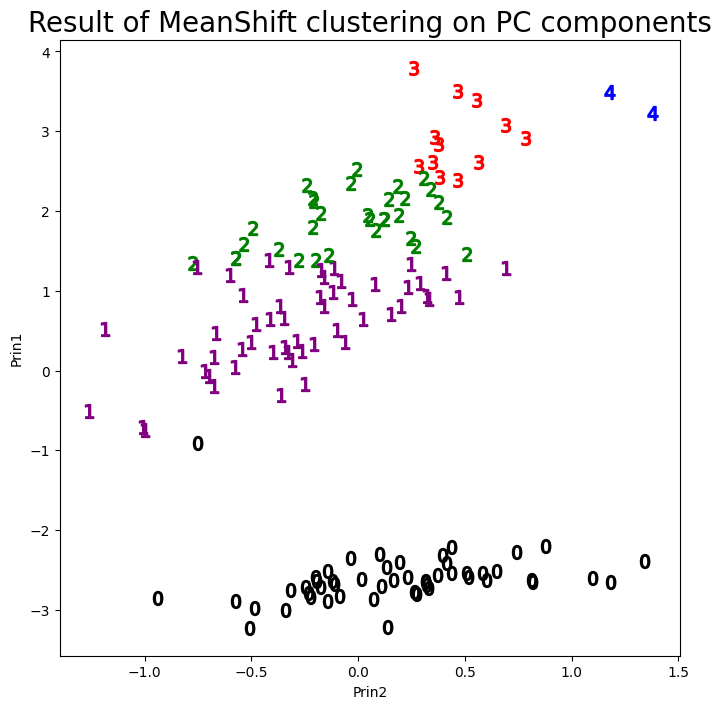

In [8]:
plt.figure(figsize=(8, 8))
plt.xlabel('Prin2'); plt.ylabel('Prin1')
color = {0: 'black', 1: 'purple', 2: 'green', 3: 'red', 4: 'blue'}
for i in range(len(X)):
    plt.scatter(pc[i, 1], pc[i, 0],
                marker="$ {}$".format(mean_shift['MeanShift'][i]),
                s=100, 
                c=color[mean_shift['MeanShift'][i]])
plt.title('Result of MeanShift clustering on PC components', fontsize=20)
plt.show()

----

## c. Compare the results of the three (hierarchical, K-means, Mean-shift) cluster analysis. Do they produce similar clusters?

In [9]:
# hierarchical
from sklearn.preprocessing import MinMaxScaler # Standardization
X_scaled = X.copy()
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.cluster import AgglomerativeClustering
hclus = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'average')
group2 = hclus.fit_predict(X_scaled)
group2 = pd.DataFrame(group2, columns = ['Hierarchical'])
result_all = mean_shift.join(group2)

# K-means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(X_scaled)
group3 = pd.DataFrame(kmeans.labels_, columns = ['Kmeans'])
result_all = result_all.join(group3)
result_all

,Sepal length,Sepal width,Petal length,Petal width,MeanShift,Hierarchical,Kmeans
0,5.10000,3.50000,1.40000,0.20000,0,0,0
1,4.90000,3.00000,1.40000,0.20000,0,0,0
2,4.70000,3.20000,1.30000,0.20000,0,0,0
3,4.60000,3.10000,1.50000,0.20000,0,0,0
4,5.00000,3.60000,1.40000,0.20000,0,0,0
...,...,...,...,...,...,...,...
145,6.70000,3.00000,5.20000,2.30000,2,2,2
146,6.30000,2.50000,5.00000,1.90000,2,1,1
147,6.50000,3.00000,5.20000,2.00000,2,2,2
148,6.20000,3.40000,5.40000,2.30000,2,2,2


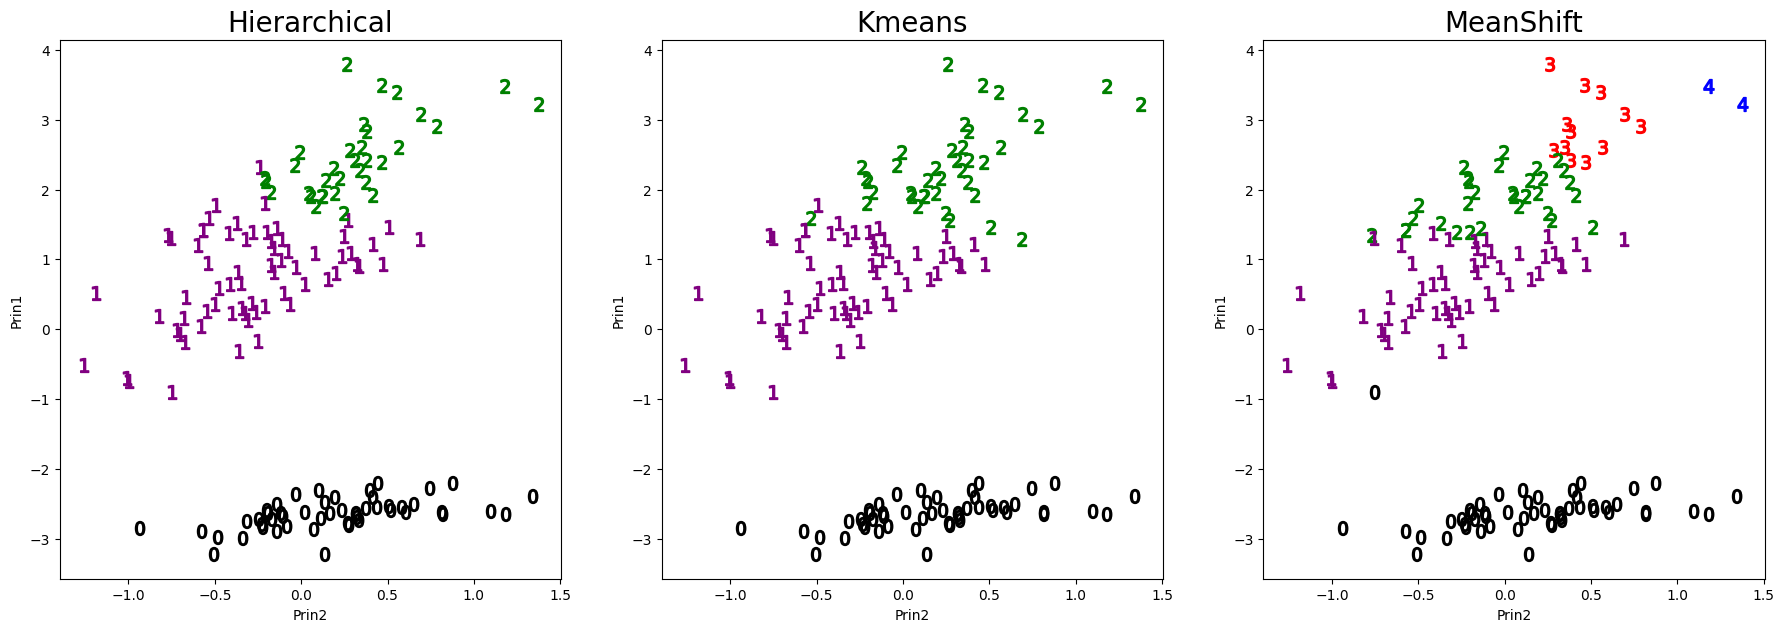

In [10]:
names = ['Hierarchical', 'Kmeans', 'MeanShift']
plotnm = 1
plt.figure(figsize=(22, 7))
for name in names:
    plt.subplot(1, 3, plotnm)
    plt.xlabel('Prin2'); plt.ylabel('Prin1')
    color = {0: 'black', 1: 'purple', 2: 'green', 3: 'red', 4: 'blue'}
    for i in range(len(X)):
        plt.scatter(pc[i, 1], pc[i, 0],
                    marker="$ {}$".format(result_all[name][i]),
                    s=100, 
                    c=color[result_all[name][i]])
    plt.title(f'{name}', fontsize=20)
    plotnm += 1
plt.show()

In terms of the number of clusters, Mean-Shift cluster analysis creates five clusters, while the other two methods create three clusters. This is because Meanshift is density-based, unlike other methodologies.

#### Hierarchical vs Kmeans

In [11]:
compare = pd.crosstab(result_all['Hierarchical'],result_all['Kmeans'])
compare['Total'] = compare.sum(axis = 1)
compare.loc['Total',:] = compare.sum(axis = 0)
compare = compare.astype(int)
compare

# Almost same

Kmeans,0,1,2,Total
Hierarchical,,,,
0,50,0,0,50
1,0,61,6,67
2,0,0,33,33
Total,50,61,39,150


#### Hierarchical vs MeanShift

In [12]:
compare = pd.crosstab(result_all['Hierarchical'],result_all['MeanShift'])
compare['Total'] = compare.sum(axis = 1)
compare.loc['Total',:] = compare.sum(axis = 0)
compare = compare.astype(int)
compare

# Different about group 3 and 4

MeanShift,0,1,2,3,4,Total
Hierarchical,,,,,,
0,50,0,0,0,0,50
1,1,53,13,0,0,67
2,0,0,19,12,2,33
Total,51,53,32,12,2,150


#### Kmeans vs MeanShift

In [13]:
compare = pd.crosstab(result_all['Kmeans'],result_all['MeanShift'])
compare['Total'] = compare.sum(axis = 1)
compare.loc['Total',:] = compare.sum(axis = 0)
compare = compare.astype(int)
compare

# Different about group 3 and 4

MeanShift,0,1,2,3,4,Total
Kmeans,,,,,,
0,50,0,0,0,0,50
1,1,52,8,0,0,61
2,0,1,24,12,2,39
Total,51,53,32,12,2,150
